In [1]:
import os

dataset_path = r"D:\Troy Msc\3rd Semester (Spring 25)\Specialized Study in CS\Project\PlantVillage"

os.listdir(dataset_path)

['test', 'train', 'validation']

In [2]:
train_path = os.path.join(dataset_path, 'train')
validation_path = os.path.join(dataset_path, 'validation')
test_path = os.path.join(dataset_path, 'test')

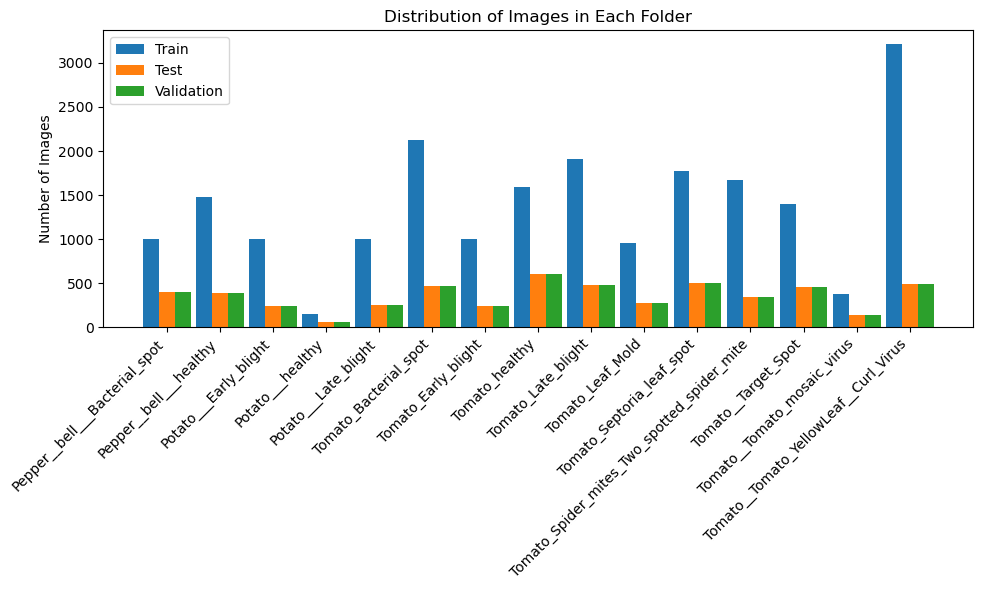

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

folders = ['train', 'test', 'validation']

subfolder_lengths = {folder: {} for folder in folders}

for folder in folders:
    subfolders = os.listdir(os.path.join(dataset_path, folder))
    for subfolder in subfolders:
        subfolder_length = len(os.listdir(os.path.join(dataset_path, folder, subfolder)))
        subfolder_lengths[folder][subfolder] = subfolder_length

subfolder_names = list(subfolder_lengths['train'].keys())
train_lengths = list(subfolder_lengths['train'].values())
test_lengths = list(subfolder_lengths['test'].values())
val_lengths = list(subfolder_lengths['validation'].values())

x = np.arange(len(subfolder_names))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, train_lengths, width, label='Train')
rects2 = ax.bar(x, test_lengths, width, label='Test')
rects3 = ax.bar(x + width, val_lengths, width, label='Validation')


ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Each Folder')
ax.set_xticks(x)
ax.set_xticklabels(subfolder_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


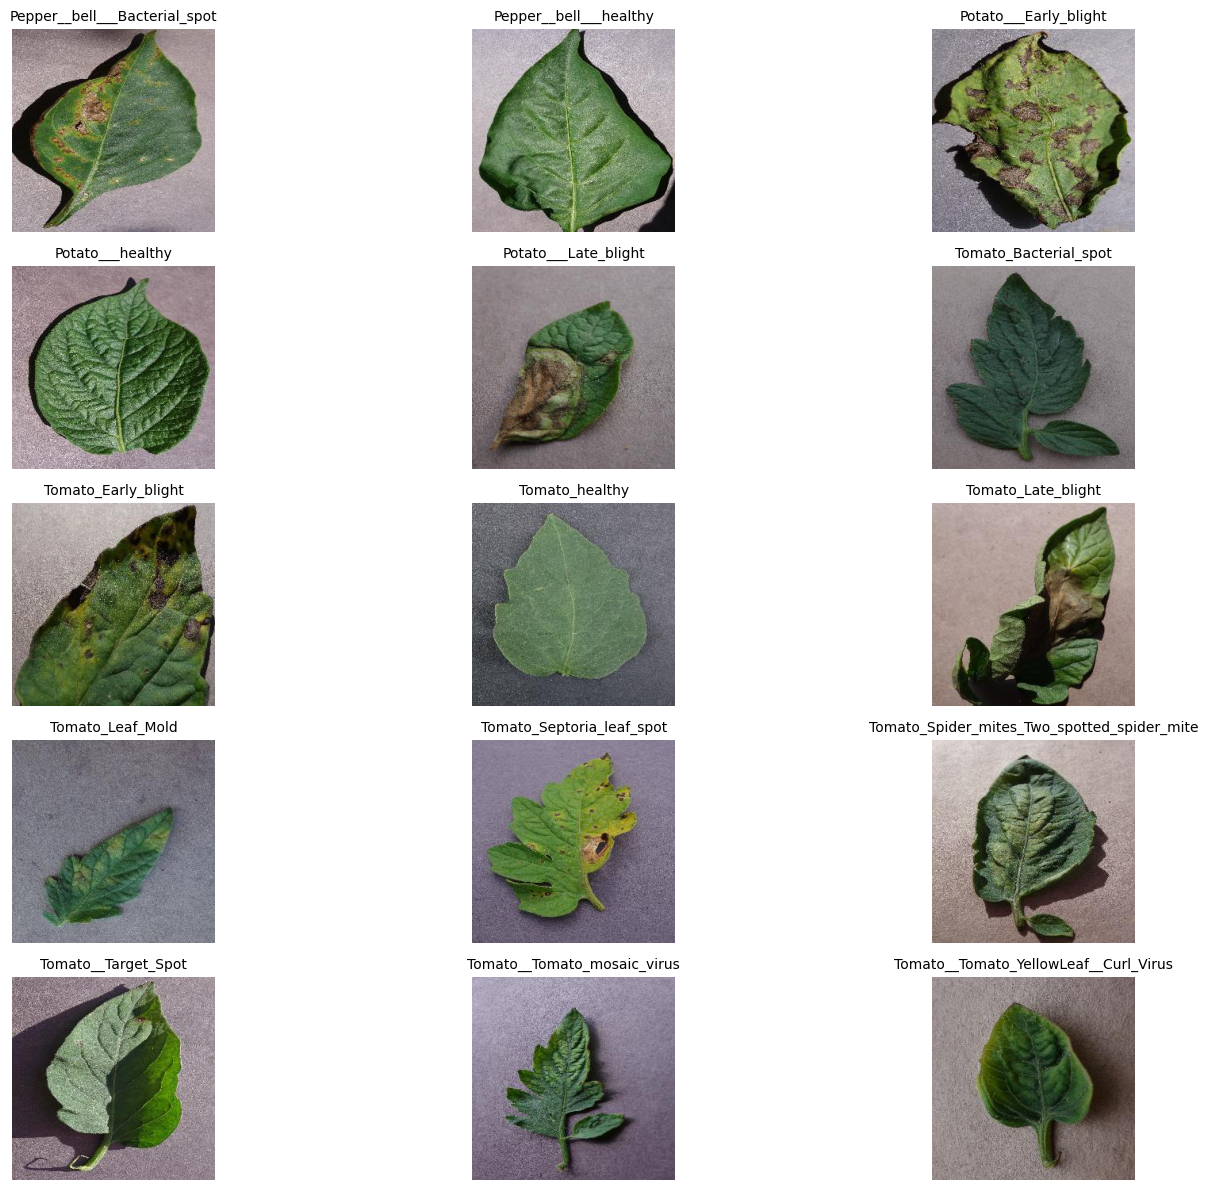

In [4]:
import matplotlib.image as mpimg

# Create a grid to display the images
num_cols = 3  # Number of columns in the grid
num_rows = 5  # Calculate number of rows

# Create a matplotlib figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Loop through subfolders and display an image from each
for i, subfolder in enumerate(subfolders):
    img = [image for image in os.listdir(os.path.join(train_path,subfolder))][0]

    img_path = os.path.join(train_path, subfolder, img)  # Get the first image in the subfolder
    img = mpimg.imread(img_path)  # Load the image
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(subfolder, color='black', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
batch_size = 32
image_shape = (256,256)

train_datagen = ImageDataGenerator(

    rescale=1/255,
    shear_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.5, 1.5],  # Adjust brightness between 50% and 150%
    rotation_range=40,  # Rotate images by up to 40 degrees
    zoom_range = 0.2

)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = image_shape,
    batch_size = batch_size,
    class_mode = "categorical"

)

Found 20638 images belonging to 15 classes.


In [9]:
validation_datagen = ImageDataGenerator(
    rescale=1/255,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size = image_shape,
    batch_size = batch_size,
    class_mode = "categorical"

)

Found 5327 images belonging to 15 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = image_shape,
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = False

)

Found 5327 images belonging to 15 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Define the CNN model
model = Sequential([
    Input(shape=(256, 256, 3)),  # Explicit Input Layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')  # Adjust the number of classes if needed
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define a ModelCheckpoint callback to save the best weights during training
checkpoint_callback = ModelCheckpoint(
    "plant_leaf_diseases_model.keras",
    monitor='val_accuracy',
    
    save_best_only=True,
    mode='max',
    verbose=1
)

# Print model summary
model.summary()

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,583,887 (25.12 MB)

 Trainable params: 6,583,887 (25.12 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,583,887 (25.12 MB)

 Trainable params: 6,583,887 (25.12 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
tf.random.set_seed(42)

steps_per_epoch = train_generator.n // batch_size     # 32
validation_steps = validation_generator.n // batch_size
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback]
)



# Find the epoch with the best accuracy on the validation (test) set
best_epoch = np.argmax(history.history['val_accuracy']) + 1

print(f"Best epoch is ==> epoch {best_epoch}")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4015 - loss: 1.8591
Epoch 1: val_accuracy improved from -inf to 0.73193, saving model to plant_leaf_diseases_model.keras
644/644 ━━━━━━━━━━━━━━━━━━━━ 1125s 2s/step - accuracy: 0.4017 - loss: 1.8584 - val_accuracy: 0.7319 - val_loss: 0.7869
Epoch 2/10
  1/644 ━━━━━━━━━━━━━━━━━━━━ 10:14 956ms/step - accuracy: 0.5625 - loss: 1.0772

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.73193
644/644 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.5625 - loss: 1.0772 - val_accuracy: 0.7169 - val_loss: 0.8266
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7199 - loss: 0.8188
Epoch 3: val_accuracy improved from 0.73193 to 0.78520, saving model to plant_leaf_diseases_model.keras
644/644 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - accuracy: 0.7199 - loss: 0.8187 - val_accuracy: 0.7852 - val_loss: 0.6503
Epoch 4/10
  1/644 ━━━━━━━━━━━━━━━━━━━━ 12:12 1s/step - accuracy: 0.6875 - loss: 0.7263
Epoch 4: val_accuracy did not improve from 0.78520
644/644 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.6875 - loss: 0.7263 - val_accuracy: 0.7651 - val_loss: 0.7448
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8039 - loss: 0.5723
Epoch 5: val_accuracy improved from 0.78520 to 0.84657, saving model to plant_leaf_diseases_model.keras
644/644 ━━━━━━━━━━━━━━━━━━━━ 919s 1s/step - accuracy: 0.8039 - loss: 0.5722

In [34]:
# Load the weights of the best model
best_model = model


# Compile the best_model
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

best_model.load_weights = r"D:/Troy Msc/3rd Semester (Spring 25)/Specialized Study in CS/Project/PlantVillage/plant_leaf_diseases_model.keras"


# Save only model weights
best_model.save("plant_leaf_diseases_model.keras")  # ✅ Saves the entire model


# Now you can use the 'best_model' for predictions or further evaluation
print("Training done and best model saved")

Training done and best model saved


In [16]:
evaluation = best_model.evaluate(test_generator,verbose=0)
print(f"Test Accuracy = {round(evaluation[1],2)}")
print(f"Test Loss = {round(evaluation[0],3)}")

Test Accuracy = 0.92
Test Loss = 0.239


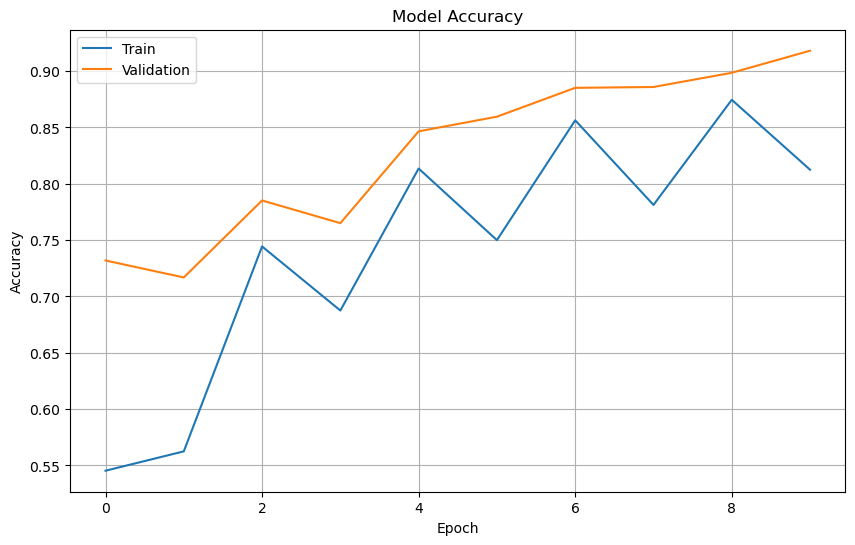

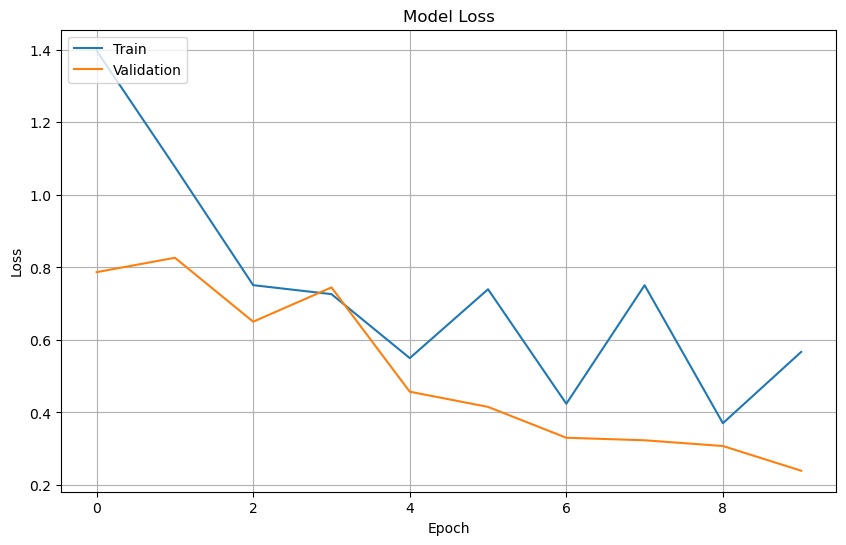

In [18]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object returned from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


In [24]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("plant_leaf_diseases_model.keras")  # Update with the correct path


In [26]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to preprocess image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize pixel values (if required)
    return img_array


In [28]:
# Path to the plant image
image_path = r"D:\Troy Msc\3rd Semester (Spring 25)\Specialized Study in CS\Project\PlantVillage\test\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG"  # Replace with the path to your test image

# Preprocess the image
input_image = preprocess_image(image_path)

# Get predictions
predictions = model.predict(input_image)

# Get the class label
class_labels = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 
                'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
                'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 
                'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Target_Spot', 
                'Tomato_Tomato_YellowLeaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tomato_healthy']

predicted_class = class_labels[np.argmax(predictions)]  # Get the class with highest probability
confidence = np.max(predictions) * 100  # Get confidence percentage

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted Class: Tomato_Bacterial_spot
Confidence: 99.98%


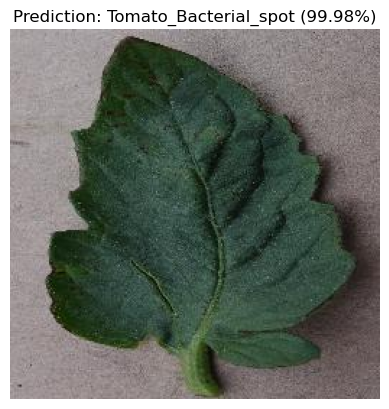

In [29]:
import matplotlib.pyplot as plt

# Display the image with predicted class
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB for display

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
plt.show()


In [36]:
model.save(r"D:\Troy Msc\3rd Semester (Spring 25)\Specialized Study in CS\Project\plant_leaf_diseases_model.keras")
